In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from datetime import datetime, timedelta

In [ ]:
# Load dataset (misalnya dari file CSV)
df = pd.read_csv('https://raw.githubusercontent.com/sendhy12/datasetd/refs/heads/main/data_produk_pasar.csv', sep=';')  # pastikan ada kolom 'jumlah' dan 'kebutuhan'
df

,id,satuan,pasar,tanggal,nama_item,keterangan,harga,jumlah,kebutuhan,item_barang,satuan_item,nama_pasar
0,26766,NaN,7,2022-01-01,1,cukup,12000,0,0,Beras Premium,kg,Pasar Parakanmuncang
1,26767,NaN,7,2022-01-01,2,cukup,11500,0,0,Beras Medium,kg,Pasar Parakanmuncang
2,26768,NaN,7,2022-01-01,3,cukup,12000,0,0,Beras Termahal,kg,Pasar Parakanmuncang
3,26769,NaN,7,2022-01-01,4,cukup,14000,0,0,Gula Pasir,kg,Pasar Parakanmuncang
4,26770,NaN,7,2022-01-01,8,cukup,3000,0,0,Minyak Goreng Bimoli,liter,Pasar Parakanmuncang
...,...,...,...,...,...,...,...,...,...,...,...,...
279718,322644,NaN,7,2024-11-19,69,cukup,44000,40,20,Susu SGM 400 gr,dus,Pasar Parakanmuncang
279719,322645,NaN,7,2024-11-19,70,cukup,30000,345,250,cabe hijau besar,kg,Pasar Parakanmuncang
279720,322646,NaN,7,2024-11-19,74,cukup,10000,650,570,Tomat Merah,Kg,Pasar Parakanmuncang
279721,322647,NaN,7,2024-11-19,75,cukup,10000,680,550,Kacang Panjang,Kg,Pasar Parakanmuncang


In [ ]:
# Filter data dimana 'satuan' adalah 'kg'
df = df[df['satuan_item'] == 'kg']
df

,id,satuan,pasar,tanggal,nama_item,keterangan,harga,jumlah,kebutuhan,item_barang,satuan_item,nama_pasar
0,26766,NaN,7,2022-01-01,1,cukup,12000,0,0,Beras Premium,kg,Pasar Parakanmuncang
1,26767,NaN,7,2022-01-01,2,cukup,11500,0,0,Beras Medium,kg,Pasar Parakanmuncang
2,26768,NaN,7,2022-01-01,3,cukup,12000,0,0,Beras Termahal,kg,Pasar Parakanmuncang
3,26769,NaN,7,2022-01-01,4,cukup,14000,0,0,Gula Pasir,kg,Pasar Parakanmuncang
6,26772,NaN,7,2022-01-01,10,cukup,8500,0,0,Tepung Terigu Segitiga Biru,kg,Pasar Parakanmuncang
...,...,...,...,...,...,...,...,...,...,...,...,...
279702,322628,NaN,7,2024-11-19,50,cukup,9000,1780,1425,Terigu non Kemasan,kg,Pasar Parakanmuncang
279705,322631,NaN,1,2024-11-19,48,cukup,40000,0,0,Ikan Tongkol Segar,kg,Pasar Inpres
279706,322632,NaN,1,2024-11-19,47,cukup,40000,0,0,Ikan Bandeng Segar,kg,Pasar Inpres
279707,322633,NaN,1,2024-11-19,50,cukup,10000,1000,530,Terigu non Kemasan,kg,Pasar Inpres


In [ ]:
# Convert 'tanggal' column to datetime objects
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%Y-%m-%d')

# Find the latest date in the DataFrame
latest_date = df['tanggal'].max()

# Calculate the date 30 days before the latest date
thirty_days_ago = latest_date - timedelta(days=30)

# Filter data for the last 30 days
df_filtered = df[df['tanggal'] >= thirty_days_ago]

# Get unique item_barang
unique_items = df_filtered['item_barang'].unique()

# Filter DataFrame for unique items within the last 30 days
df = df_filtered[df_filtered['item_barang'].isin(unique_items)]

df

<ipython-input-4-e552942cc820>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal'] = pd.to_datetime(df['tanggal'], format='%Y-%m-%d')


,id,satuan,pasar,tanggal,nama_item,keterangan,harga,jumlah,kebutuhan,item_barang,satuan_item,nama_pasar
268716,311404,NaN,1,2024-10-20,2,cukup,13000,2000,690,Beras Medium,kg,Pasar Inpres
268724,311412,NaN,1,2024-10-20,16,cukup,26000,0,0,Telur Ayam Ras,kg,Pasar Inpres
269508,312210,NaN,1,2024-10-22,40,cukup,45000,0,0,Ikan Kembung,kg,Pasar Inpres
269512,312214,NaN,1,2024-10-22,45,cukup,18000,0,0,Kentang,kg,Pasar Inpres
269804,312510,NaN,1,2024-10-23,43,cukup,14000,0,0,Jagung Pipilan Kering,kg,Pasar Inpres
...,...,...,...,...,...,...,...,...,...,...,...,...
279702,322628,NaN,7,2024-11-19,50,cukup,9000,1780,1425,Terigu non Kemasan,kg,Pasar Parakanmuncang
279705,322631,NaN,1,2024-11-19,48,cukup,40000,0,0,Ikan Tongkol Segar,kg,Pasar Inpres
279706,322632,NaN,1,2024-11-19,47,cukup,40000,0,0,Ikan Bandeng Segar,kg,Pasar Inpres
279707,322633,NaN,1,2024-11-19,50,cukup,10000,1000,530,Terigu non Kemasan,kg,Pasar Inpres


In [ ]:
# Group by 'item_barang' and sum 'jumlah' and 'kebutuhan'
df = df.groupby('item_barang').agg({'jumlah': 'sum', 'kebutuhan': 'sum'})

df

,jumlah,kebutuhan
item_barang,,
Bawang Merah,65462,35506
Bawang Putih,56637,30133
Beras Medium,662348,203047
Beras Premium,693949,167460
Cabe Merah Biasa,30053,15448
Cabe Merah Keriting,37925,20808
Cabe Rawit Hijau,34506,19113
Cabe Rawit Merah Domba,32466,18557
Daging Ayam Ras,118886,104513


In [ ]:
# Reset the index of the DataFrame
df = df.reset_index()

df

,item_barang,jumlah,kebutuhan
0,Bawang Merah,65462,35506
1,Bawang Putih,56637,30133
2,Beras Medium,662348,203047
3,Beras Premium,693949,167460
4,Cabe Merah Biasa,30053,15448
5,Cabe Merah Keriting,37925,20808
6,Cabe Rawit Hijau,34506,19113
7,Cabe Rawit Merah Domba,32466,18557
8,Daging Ayam Ras,118886,104513
9,Daging Sapi Murni,50324,39389


In [ ]:
import numpy as np
import tensorflow as tf

# Ambil fitur jumlah dan kebutuhan
data = df[['jumlah', 'kebutuhan']].values.astype(np.float32)

# Hitung mean dan std dari data training
mean_training = np.mean(data, axis=0)
std_training = np.std(data, axis=0)

# Normalisasi
data = (data - mean_training) / std_training

# Simpan mean dan std
np.save('mean.npy', mean_training)
np.save('std.npy', std_training)

# Konversi ke Tensor
data_tf = tf.convert_to_tensor(data)

# Hyperparameter
k = 2
num_steps = 100
batch_size = min(1024, len(data))

# Inisialisasi centroid
np.random.seed(42)
initial_indices = tf.constant(np.random.choice(len(data), k, replace=False), dtype=tf.int32)
centroids = tf.Variable(tf.gather(data_tf, initial_indices))

# Training loop
for step in range(num_steps):
    indices = np.random.choice(len(data), batch_size, replace=False)
    batch = tf.gather(data_tf, indices)

    expanded_batch = tf.expand_dims(batch, 1)
    expanded_centroids = tf.expand_dims(centroids, 0)
    distances = tf.reduce_sum(tf.square(expanded_batch - expanded_centroids), axis=2)
    assignments = tf.argmin(distances, axis=1)

    new_centroids = []
    for i in range(k):
        assigned = tf.boolean_mask(batch, assignments == i)
        if tf.shape(assigned)[0] > 0:
            new_centroids.append(tf.reduce_mean(assigned, axis=0))
        else:
            new_centroids.append(centroids[i])
    centroids.assign(tf.stack(new_centroids))

    if (step + 1) % 10 == 0:
        print(f"Langkah {step + 1} selesai")

# Simpan centroid
np.save('centroids.npy', centroids.numpy())

Langkah 10 selesai
Langkah 20 selesai
Langkah 30 selesai
Langkah 40 selesai
Langkah 50 selesai
Langkah 60 selesai
Langkah 70 selesai
Langkah 80 selesai
Langkah 90 selesai
Langkah 100 selesai


In [ ]:
# Hitung inertia (jumlah kuadrat jarak dari tiap titik ke centroid-nya)
expanded_data = tf.expand_dims(data_tf, 1)
expanded_centroids = tf.expand_dims(centroids, 0)
distances = tf.reduce_sum(tf.square(expanded_data - expanded_centroids), axis=2)
assignments = tf.argmin(distances, axis=1)

inertia = tf.reduce_sum(tf.reduce_min(distances, axis=1))
print(f"Inertia (total within-cluster sum of squares): {inertia.numpy():.4f}")

Inertia (total within-cluster sum of squares): 7.2727


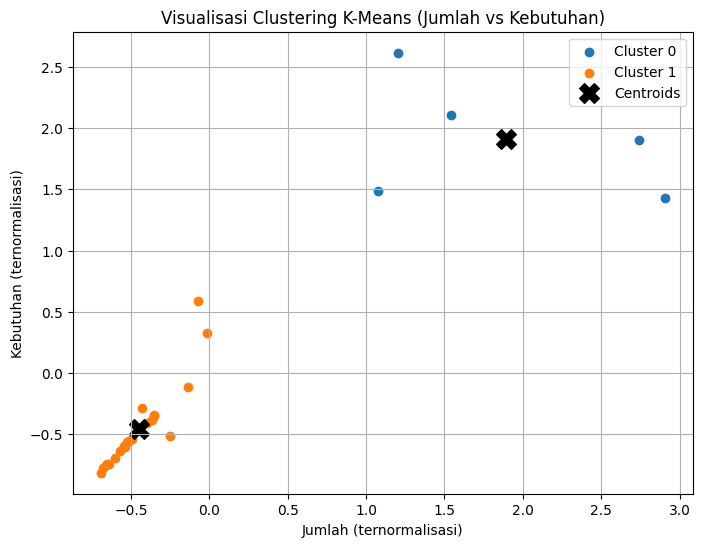

In [ ]:
# Ambil data asli (dalam bentuk NumPy array), assign cluster
assignments_np = assignments.numpy()
data_np = data_tf.numpy()
centroids_np = centroids.numpy()

# Plot hasil clustering
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = data_np[assignments_np == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title('Visualisasi Clustering K-Means (Jumlah vs Kebutuhan)')
plt.xlabel('Jumlah (ternormalisasi)')
plt.ylabel('Kebutuhan (ternormalisasi)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Pastikan data dan label klaster dalam bentuk numpy
data_np = data_tf.numpy()
labels_np = assignments.numpy()

# Hitung silhouette score
sil_score = silhouette_score(data_np, labels_np)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.8134


In [ ]:
# Gabungkan dengan DataFrame asli (pastikan urutan data sesuai)
df_clustered = df.copy()
df_clustered['cluster'] = assignments.numpy()

In [ ]:
# Jika Anda simpan nilai mean dan std sebelumnya:
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

df_clustered['jumlah_asli'] = df_clustered['jumlah']
df_clustered['kebutuhan_asli'] = df_clustered['kebutuhan']

df_clustered['jumlah'] = df_clustered['jumlah'] * std[0] + mean[0]
df_clustered['kebutuhan'] = df_clustered['kebutuhan'] * std[1] + mean[1]

In [ ]:
# Rata-rata dan sebaran untuk tiap cluster
summary = df_clustered.groupby('cluster')[['jumlah', 'kebutuhan']].agg(['mean', 'min', 'max', 'std'])
summary

jumlah                                              \
                  mean           min            max            std   
cluster                                                              
0        498813.970268  3.407660e+05  693948.958637  167361.407411   
1         46272.806766 -3.438729e-08  130436.992225   38403.624376   

             kebutuhan                                              
                  mean            min            max           std  
cluster                                                             
0        203270.587884  167459.990019  256150.984732  36400.850105  
1         26936.188871       0.000000  104512.993771  26515.891230

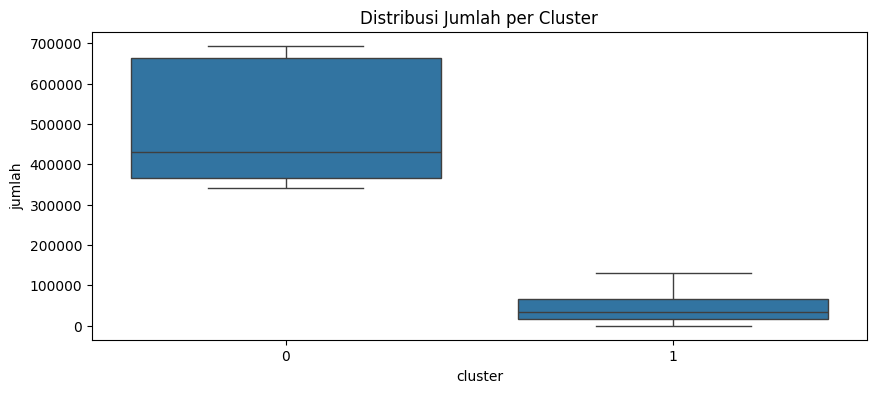

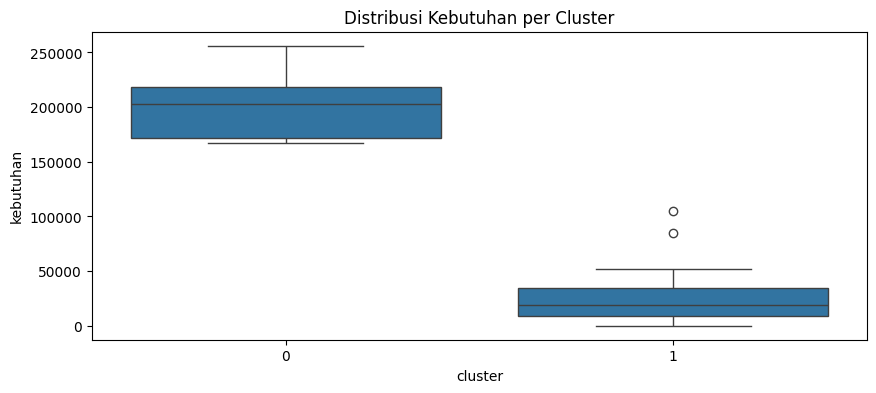

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_clustered, x='cluster', y='jumlah')
plt.title("Distribusi Jumlah per Cluster")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_clustered, x='cluster', y='kebutuhan')
plt.title("Distribusi Kebutuhan per Cluster")
plt.show()

In [ ]:
# Tambahkan label cluster ke dataframe asli
df['cluster'] = assignments.numpy()

# Tampilkan contoh item dari setiap cluster
for i in range(k):  # k = jumlah cluster
    print(f"\nContoh item dari Cluster {i}:")
    display(df[df['cluster'] == i][['item_barang', 'jumlah', 'kebutuhan']].head(5))


Contoh item dari Cluster 0:


,item_barang,jumlah,kebutuhan
2,Beras Medium,662348,203047
3,Beras Premium,693949,167460
10,Garam Beryodium Halus Kemasan,431021,218079
11,Gula Pasir,340766,171616
23,Terigu non Kemasan,365986,256151



Contoh item dari Cluster 1:


,item_barang,jumlah,kebutuhan
0,Bawang Merah,65462,35506
1,Bawang Putih,56637,30133
4,Cabe Merah Biasa,30053,15448
5,Cabe Merah Keriting,37925,20808
6,Cabe Rawit Hijau,34506,19113


In [ ]:
# Tambahkan label cluster ke dataframe asli
df['cluster'] = assignments.numpy()

# Tampilkan contoh item dari setiap cluster beserta tanggal
for i in range(k):  # k = jumlah cluster
    print(f"\nContoh item dari Cluster {i}:")
    # Gabungkan kembali dengan df asli untuk mendapatkan tanggal
    cluster_df = df[df['cluster'] == i][['item_barang', 'jumlah', 'kebutuhan']].head(5)
    cluster_df_with_dates = pd.merge(cluster_df, df_filtered, on=['item_barang', 'jumlah', 'kebutuhan'], how='left')
    display(cluster_df_with_dates[['item_barang', 'jumlah', 'kebutuhan', 'tanggal']].head(5))



Contoh item dari Cluster 0:


,item_barang,jumlah,kebutuhan,tanggal
0,Beras Medium,662348,203047,NaT
1,Beras Premium,693949,167460,NaT
2,Garam Beryodium Halus Kemasan,431021,218079,NaT
3,Gula Pasir,340766,171616,NaT
4,Terigu non Kemasan,365986,256151,NaT



Contoh item dari Cluster 1:


,item_barang,jumlah,kebutuhan,tanggal
0,Bawang Merah,65462,35506,NaT
1,Bawang Putih,56637,30133,NaT
2,Cabe Merah Biasa,30053,15448,NaT
3,Cabe Merah Keriting,37925,20808,NaT
4,Cabe Rawit Hijau,34506,19113,NaT


In [ ]:
import numpy as np
import tensorflow as tf

# === Load model & parameter normalisasi ===
centroids_loaded = np.load('centroids.npy')
mean_training = np.load('mean.npy')
std_training = np.load('std.npy')

centroids_tf = tf.convert_to_tensor(centroids_loaded, dtype=tf.float32)

# === Input dari pengguna ===
tanggal = input("Masukkan tanggal (YYYY-MM-DD): ")
nama_barang = input("Masukkan nama barang: ")
jumlah = float(input("Masukkan jumlah barang: "))
kebutuhan = float(input("Masukkan kebutuhan barang: "))

# === Proses normalisasi ===
data_baru = np.array([[jumlah, kebutuhan]], dtype=np.float32)
data_baru = (data_baru - mean_training) / std_training

# === Prediksi klaster ===
data_tf = tf.convert_to_tensor(data_baru)
expanded_data = tf.expand_dims(data_tf, 1)
expanded_centroids = tf.expand_dims(centroids_tf, 0)

distances = tf.reduce_sum(tf.square(expanded_data - expanded_centroids), axis=2)
assigned_cluster = tf.argmin(distances, axis=1).numpy()[0]

# === Tampilkan hasil ===
print("\n=== HASIL INFERENSI ===")
print(f"Tanggal       : {tanggal}")
print(f"Nama Barang   : {nama_barang}")
print(f"Jumlah        : {jumlah}")
print(f"Kebutuhan     : {kebutuhan}")
print(f"Cluster       : {assigned_cluster}")